# Task-2:Pclub_secy_recruitment
### Author: Aayush Anand(230025)

### 1. Loading the dataset and preprocessing

dataset.xlsx is loaded and irrelevant columns are deleted from the dataframe i.e.'estimated PBW', 'estimated tidal volume (ETV)' , 'ETV/PBW', 'estimator occupation', 'estimator experience', 'estimator sex'. 

In [102]:
import pandas as pd
file_path = 'dataset.xlsx'
df = pd.read_excel(file_path)
columns_to_delete = [
    'estimated PBW',
    'estimated tidal volume (ETV)',
    'ETV/PBW',
    'estimator occupation',
    'estimator experience',
    'estimator sex'
]
df.drop(columns=columns_to_delete, inplace=True)
output_file_path = 'dataset_ch.xlsx'
df.to_excel(output_file_path, index=False)

In [74]:
df

,sex,height,predicted body weight (PBW),tidalvolume,estimated body height,estimator age
0,1,154,51.5,309,180,26.0
1,1,154,51.5,309,178,32.0
2,1,154,51.5,309,176,34.0
3,1,154,51.5,309,176,32.0
4,1,154,51.5,309,175,30.0
...,...,...,...,...,...,...
1028,1,188,82.4,494,175,40.0
1029,1,188,82.4,494,173,43.0
1030,1,188,82.4,494,172,32.0
1031,1,188,82.4,494,168,33.0


In [103]:
df = df.dropna() #Drop columns with N/A value

In [76]:
df

,sex,height,predicted body weight (PBW),tidalvolume,estimated body height,estimator age
0,1,154,51.5,309,180,26.0
1,1,154,51.5,309,178,32.0
2,1,154,51.5,309,176,34.0
3,1,154,51.5,309,176,32.0
4,1,154,51.5,309,175,30.0
...,...,...,...,...,...,...
1028,1,188,82.4,494,175,40.0
1029,1,188,82.4,494,173,43.0
1030,1,188,82.4,494,172,32.0
1031,1,188,82.4,494,168,33.0


### 2. Simple Linear Regression with All the features

In [77]:
features = ['sex', 'height', 'predicted body weight (PBW)', 'estimated body height', 'estimator age']
target = 'tidalvolume'


In [78]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)


In [79]:
df

,height,predicted body weight (PBW),tidalvolume,estimated body height,estimator age,sex_2
0,154,51.5,309,180,26.0,False
1,154,51.5,309,178,32.0,False
2,154,51.5,309,176,34.0,False
3,154,51.5,309,176,32.0,False
4,154,51.5,309,175,30.0,False
...,...,...,...,...,...,...
1028,188,82.4,494,175,40.0,False
1029,188,82.4,494,173,43.0,False
1030,188,82.4,494,172,32.0,False
1031,188,82.4,494,168,33.0,False


In [80]:
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 20.855959652797278


### 3. Simple Linear Regression with most correlated factors
Most correlated factors are found out by using the correlation matrix.

In [86]:
correlation_matrix = df.corr()


In [87]:
print(correlation_matrix['tidalvolume'])


height                         0.989421
predicted body weight (PBW)    0.996291
tidalvolume                    1.000000
estimated body height          0.742060
estimator age                  0.004993
sex_2                         -0.510519
Name: tidalvolume, dtype: float64


In [88]:
thresh = 0.7

using following features:  ['height', 'predicted body weight (PBW)', 'estimated body height']

In [89]:
features_top = correlation_matrix.index[abs(correlation_matrix['tidalvolume']) > thresh].tolist()
features_top.remove('tidalvolume')
print(f"Selected features based on correlation: {features_top}")


Selected features based on correlation: ['height', 'predicted body weight (PBW)', 'estimated body height']


In [90]:
X = df[features_top]
y = df['tidalvolume']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)


In [94]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 20.810066903727762


using following features : ['height', 'predicted body weight (PBW)']

In [95]:
thresh = 0.9
features_top = correlation_matrix.index[abs(correlation_matrix['tidalvolume']) > thresh].tolist()
features_top.remove('tidalvolume')
print(f"Selected features based on correlation: {features_top}")
X = df[features_top]
y = df['tidalvolume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

Selected features based on correlation: ['height', 'predicted body weight (PBW)']
MSE: 20.862833261802745


In [96]:
accuracy = model.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9928107058097374


### 4. Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

### 5. Support Vector Regression

In [98]:
from sklearn.svm import LinearSVR
features = ['height', 'predicted body weight (PBW)', 'estimated body height', 'estimator age']
target = 'tidalvolume'
model = LinearSVR(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 20.99884199994207


/home/aayush/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/aayush/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 6. Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 10.317739203364354


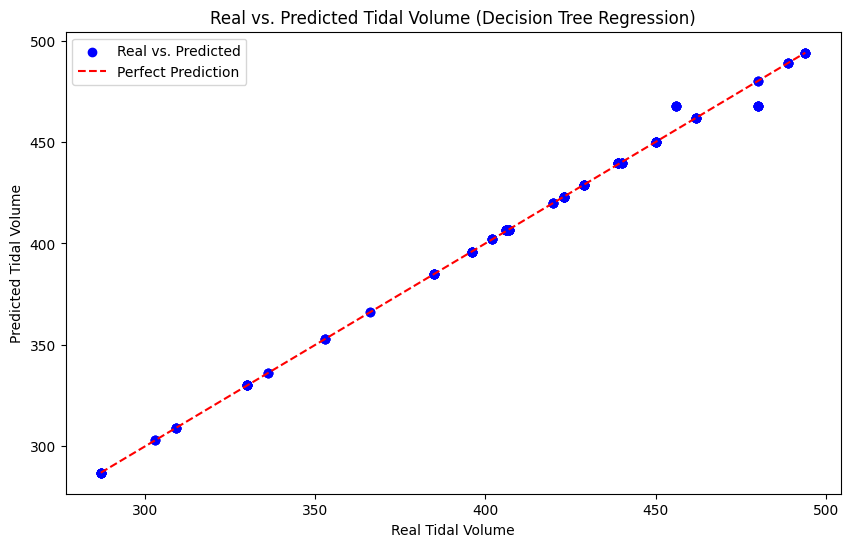

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Real vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Real Tidal Volume')
plt.ylabel('Predicted Tidal Volume')
plt.title('Real vs. Predicted Tidal Volume (Decision Tree Regression)')
plt.legend()
plt.show()

### 7. Random Forest Regression

MSE: 10.29686973851637


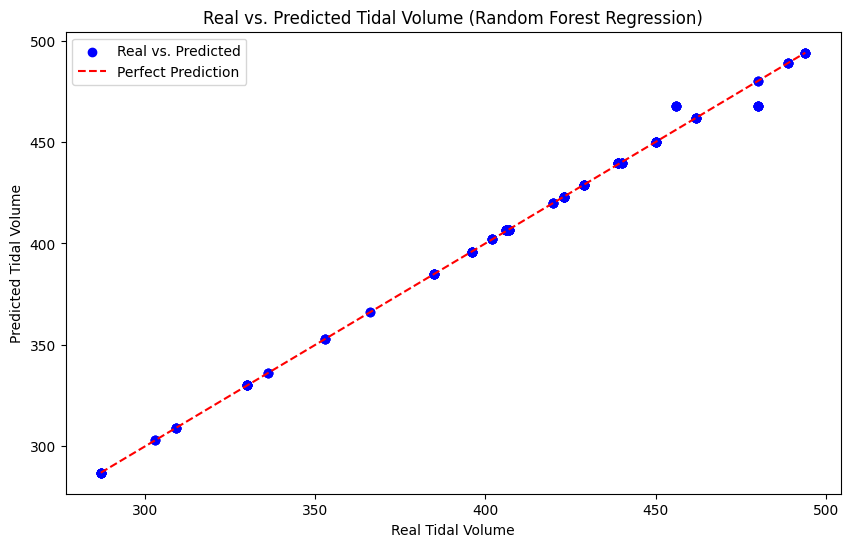

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Real vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Real Tidal Volume')
plt.ylabel('Predicted Tidal Volume')
plt.title('Real vs. Predicted Tidal Volume (Random Forest Regression)')
plt.legend()
plt.show()

### So, best results are obtained by using Random Forest Regression and Decision Tree Regression.